# Hello Fulcra: Connecting and Retrieving Your Data

> This notebook is an introduction to accessing your data using the Fulcra 
Data API.

This uses the `fulcra-api-python` module, which is available on GitHub
at [https://github.com/fulcradynamics/fulcra-api-python](https://github.com/fulcradynamics/fulcra-api-python).


In [ ]:
!pip install git+https://github.com/fulcradynamics/fulcra-api-python.git@main


## Logging in to Fulcra

To make calls to the API, call `authorize()` first.  You authorize the `FulcraAPI`
instance using your browser.  The `authorize()` function will generate a link below
that you should click to log in to Fulcra.  (Depending on the notebook front-end 
you're using, this tab may open automatically. On Colaboratory and other hosted
solutions, pop-up blockers usually prevent this from happening.)

Once you've logged in, close the tab; you should see "Authorization succeeded" 
displayed in the notebook output.  from fulcra_api.core import FulcraAPI

fulcra = FulcraAPI()

In [3]:
fulcra.authorize()

'LOLS'

## Retrieving Time Series Data

Once your `FulcraAPI` instance is authorized, you can now use it 
to make API calls.

The `time_series_grouped` function returns a Pandas dataframe.

In [6]:
df = fulcra.time_series_grouped(
    start_time = "2023-07-01 04:00:00.000Z",
    end_time = "2023-07-10 04:00:00.000Z",
    metrics=["DistanceTraveledOnFoot", 
        "AppleWatchExerciseTime",
        "ActiveCaloriesBurned",
        "BasalCaloriesBurned"
    ]
)
df

,distance_on_foot,apple_watch_exercise_time,active_calories_burned,basal_calories_burned
time,,,,
2023-07-01 04:00:00+00:00,NaN,<NA>,0.124000,1.333887
2023-07-01 04:01:00+00:00,NaN,<NA>,0.187429,1.333887
2023-07-01 04:02:00+00:00,NaN,<NA>,0.191016,1.333887
2023-07-01 04:03:00+00:00,NaN,<NA>,0.243587,1.333887
2023-07-01 04:04:00+00:00,NaN,<NA>,0.290446,1.333887
...,...,...,...,...
2023-07-10 03:55:00+00:00,0.000000,<NA>,0.371190,1.375441
2023-07-10 03:56:00+00:00,0.000856,<NA>,0.280462,1.583391
2023-07-10 03:57:00+00:00,NaN,<NA>,0.358275,1.607195


<Axes: xlabel='time'>

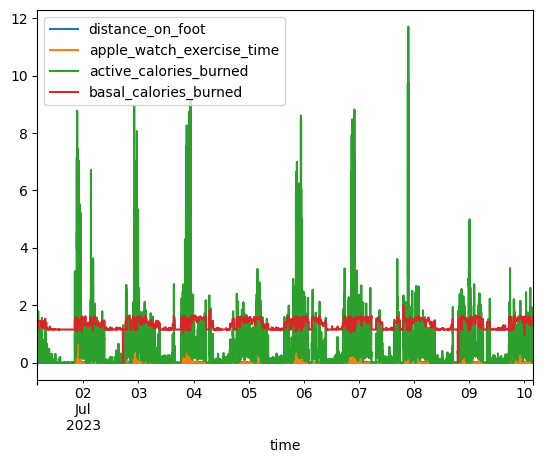

In [7]:
df.plot()